In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
import tensorflow as tf
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.applications import VGG16

Text(0.5, 1.0, 'No Tumor')

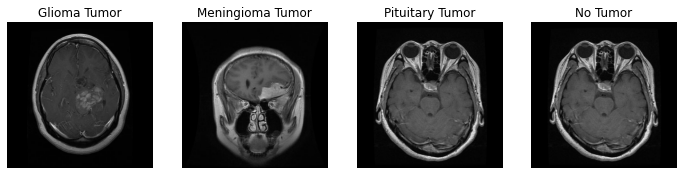

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols=4,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('data/Training/glioma_tumor/gg (1).jpg', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Glioma Tumor')


ax_2 = ax[1]
img2 = load_img('data/Training/meningioma_tumor/m (10).jpg', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('Meningioma Tumor')

ax_3 = ax[2]
img3 = load_img('data/Training/pituitary_tumor/p (1).jpg', target_size=(256,256))
ax_3.imshow(img3)
ax_3.axis('off')
ax_3.set_title('Pituitary Tumor')

ax_4 = ax[3]
img4 = load_img('data/Training/no_tumor/1.jpg', target_size=(256,256))
ax_4.imshow(img3)
ax_4.axis('off')
ax_4.set_title('No Tumor')

In [35]:
df = pd.DataFrame()
df['folder'] = ['Testing','Testing', 'Testing','Testing',
                    'Training','Training', 'Training','Training']
df['images'] = [101, 116, 75, 106,
                    827, 823, 828, 396]
df['class'] = ['Glioma','Meningioma', 'Pituitaty', 'No Tumor',
                    'Glioma','Meningioma', 'Pituitaty', 'No Tumor']

df

,folder,images,class
0,Testing,101,Glioma
1,Testing,116,Meningioma
2,Testing,75,Pituitaty
3,Testing,106,No Tumor
4,Training,827,Glioma
5,Training,823,Meningioma
6,Training,828,Pituitaty
7,Training,396,No Tumor


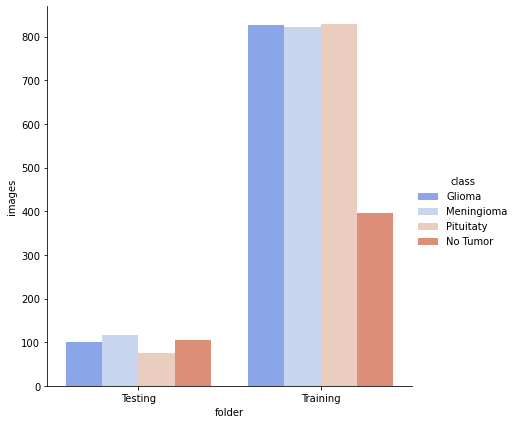

In [33]:
sns.catplot(
    data=df, kind="bar",
    x="folder", y="images", hue="class",
    palette="coolwarm", height=6
)

In [174]:
train = ImageDataGenerator().flow_from_directory(
        directory = 'data/Training',
        class_mode = 'categorical',
        target_size = (256, 256),
        batch_size = 2870,
) 


Found 2870 images belonging to 4 classes.


In [175]:
test = ImageDataGenerator().flow_from_directory(
        directory = 'data/Testing',
        class_mode = 'categorical',
        target_size = (256, 256),
        batch_size = 394) 


Found 394 images belonging to 4 classes.


In [176]:
test_images, test_labels = next(test)
train_images, train_labels = next(train)

In [177]:
train_labels[0]

array([0., 1., 0., 0.], dtype=float32)

In [179]:
train_images.shape

(2870, 256, 256, 3)

In [180]:
test_images.shape

(394, 256, 256, 3)

In [167]:
test_labels = np.reshape(test_labels, (len(test_labels),4)).astype(int)
train_labels = np.reshape(train_labels, (len(train_labels),4)).astype(int)

In [168]:
train_labels[0]

array([0, 1, 0, 0])

#### Creating Validation Set

In [181]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.05)

In [182]:
x_val.shape

(144, 256, 256, 3)

In [183]:
x_train.shape

(2726, 256, 256, 3)

## CNN

In [184]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(4, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
              optimizer = "Adam",
              metrics=['accuracy'])

In [185]:
cnn.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 123008)            0         
                                                                 
 dense_41 (Dense)            (None, 32)              

In [187]:
cnn1 = cnn.fit(x_train,
                    y_train,
                    epochs = 5,
                    validation_data=(x_val, y_val),
                      workers = -1)

Epoch 1/5
86/86 [==============================] - 174s 2s/step - loss: 0.9030 - accuracy: 0.6768 - val_loss: 0.5763 - val_accuracy: 0.8264
Epoch 2/5
86/86 [==============================] - 168s 2s/step - loss: 0.3449 - accuracy: 0.8712 - val_loss: 0.4806 - val_accuracy: 0.8472
Epoch 3/5
86/86 [==============================] - 164s 2s/step - loss: 0.1412 - accuracy: 0.9490 - val_loss: 0.6678 - val_accuracy: 0.8681
Epoch 4/5
86/86 [==============================] - 174s 2s/step - loss: 0.0799 - accuracy: 0.9780 - val_loss: 0.6046 - val_accuracy: 0.8611
Epoch 5/5
86/86 [==============================] - 196s 2s/step - loss: 0.1088 - accuracy: 0.9729 - val_loss: 0.7206 - val_accuracy: 0.9028


In [188]:
results_train = cnn.evaluate(x_train, y_train)
results_test = cnn.evaluate(test_images, test_labels)
print('Train: ',results_train)
print('Test: ',results_test)

13/13 [==============================] - 10s 715ms/step - loss: 2.7957 - accuracy: 0.6853
Train:  [0.04200282692909241, 0.9915627241134644]
Test:  [2.7956924438476562, 0.6852791905403137]


### Another CNN

In [189]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation = 'softmax'))

In [190]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_62 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 126, 126, 64)     0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 126, 126, 64)      0         
                                                                 
 conv2d_63 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 conv2d_64 (Conv2D)          (None, 122, 122, 64)      36928     
                                                     

In [191]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [192]:
hist = model.fit(x_train,
                    y_train,
                    epochs=3,
                    validation_data=(x_val, y_val),
                      workers = -1)

Epoch 1/3
86/86 [==============================] - 756s 9s/step - loss: 2.9464 - accuracy: 0.4204 - val_loss: 0.9746 - val_accuracy: 0.5278
Epoch 2/3
86/86 [==============================] - 1157s 14s/step - loss: 0.9232 - accuracy: 0.5950 - val_loss: 0.7924 - val_accuracy: 0.5903
Epoch 3/3
86/86 [==============================] - 1610s 19s/step - loss: 0.7734 - accuracy: 0.6647 - val_loss: 0.8605 - val_accuracy: 0.6042


In [194]:
results_train =  model.evaluate(x_train, y_train)
results_test = model.evaluate(test_images, test_labels)
print('Train: ',results_train)
print('Test: ',results_test)

13/13 [==============================] - 29s 2s/step - loss: 1.6017 - accuracy: 0.3706
Train:  [0.780193030834198, 0.6768158674240112]
Test:  [1.6016546487808228, 0.37055838108062744]
